

<div align="center">
  <h1>Mall Customers Clustering</h1>
</div>

In [9]:
import pandas as p
df = p.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<BarContainer object of 2 artists>

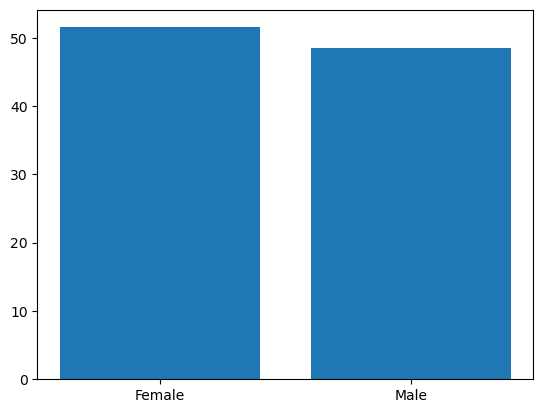

In [10]:
spending_by_gender = df.groupby('Genre')['Spending Score (1-100)'].mean()
import matplotlib.pyplot as plt
plt.bar(spending_by_gender.index, spending_by_gender.values)

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

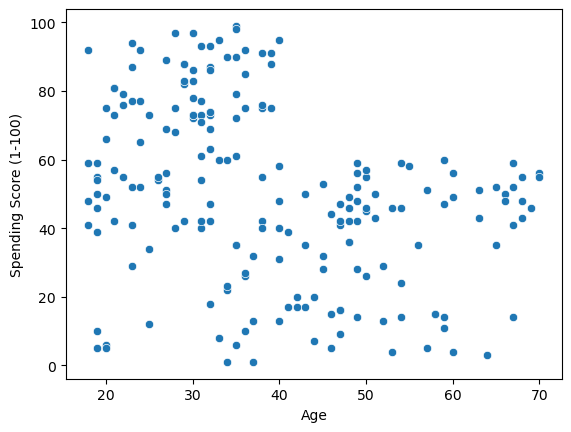

In [11]:
import seaborn as sns
sns.scatterplot(df, x='Age'
, y='Spending Score (1-100)')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

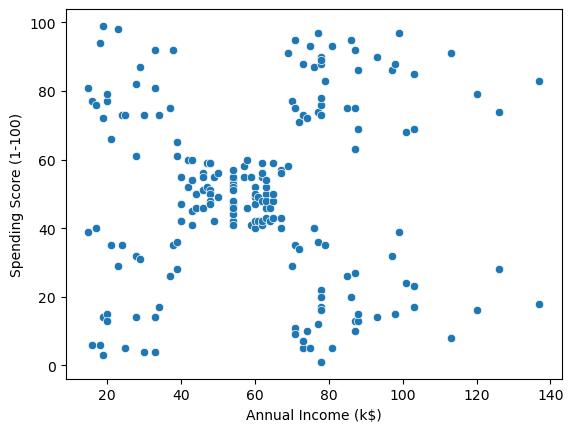

In [12]:
sns.scatterplot(df, x='Annual Income (k$)'
, y='Spending Score (1-100)')

In [13]:
columns_to_drop = ['CustomerID', 'Gender', 'Age']
existing_columns = [col for col in columns_to_drop if col in df.columns]
X = df.drop(columns=existing_columns).values

In [14]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

# Assuming X is a numpy array and the first column is categorical
X_cat = X[:, 0].reshape(-1, 1)  # Get the categorical column
X_num = X[:, 1:]  # Get the numerical columns

# One-hot encode the categorical column
encoder = OneHotEncoder()
X_cat_encoded = encoder.fit_transform(X_cat)

# Combine the encoded categorical data with numerical data
X_processed = np.hstack((X_cat_encoded.toarray(), X_num))

# Now you can proceed with KMeans
inertia = []
for i in range(2, 11):
    model = KMeans(n_clusters=i, random_state=7)
    model.fit(X_processed)
    inertia.append(model.inertia_)

Text(0, 0.5, 'Inertia')

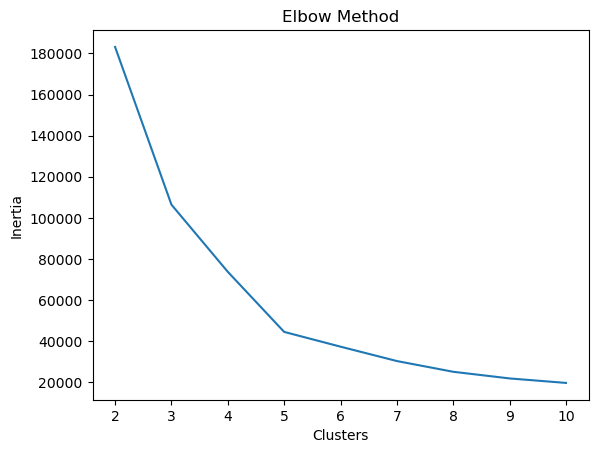

In [15]:
plt.plot(range(2, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

In [16]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

# Assuming X is a numpy array and the first column is categorical
X_cat = X[:, 0].reshape(-1, 1)  # Get the categorical column
X_num = X[:, 1:]  # Get the numerical columns

# One-hot encode the categorical column
encoder = OneHotEncoder(sparse=False)
X_cat_encoded = encoder.fit_transform(X_cat)

# Combine the encoded categorical data with numerical data
X_encoded = np.hstack((X_cat_encoded, X_num))

# Now fit KMeans
KMeansModel = KMeans(n_clusters=5, random_state=786)
KMeansModel.fit(X_encoded)
centers = KMeansModel.cluster_centers_

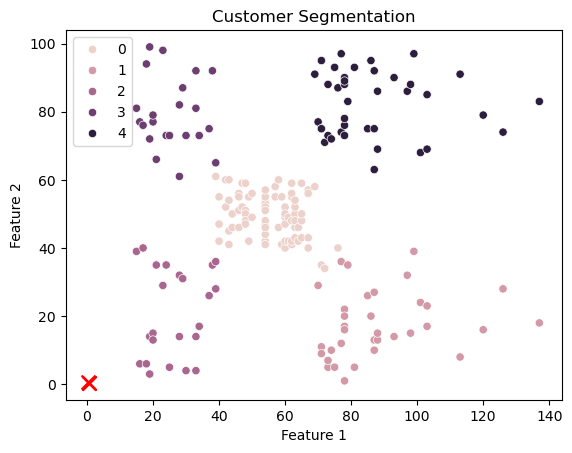

In [17]:
# Predict cluster labels using the encoded data
labels = KMeansModel.predict(X_encoded)

# Plot the clusters
center_x = centers[:, 0]
center_y = centers[:, 1]
sns.scatterplot(x=X_encoded[:, -2], y=X_encoded[:, -1], hue=labels)
plt.scatter(center_x, center_y, marker='x', s=100, c='red')
plt.title('Customer Segmentation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

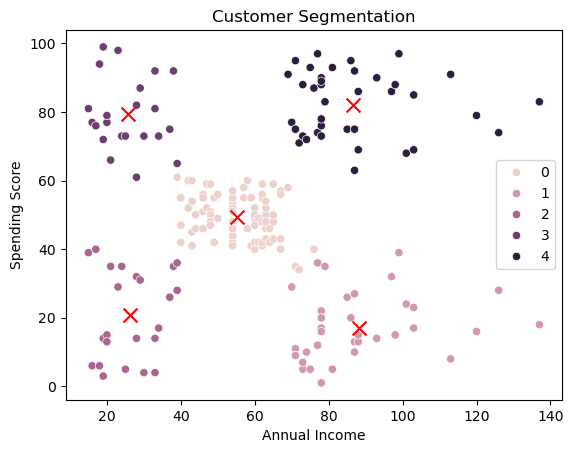

In [18]:
# Plot the clusters
sns.scatterplot(x=X[:, -2], y=X[:, -1], hue=labels)
plt.scatter(centers[:, -2], centers[:, -1], marker='x', s=100, c='red')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [19]:
labels = KMeansModel.predict(X_encoded)

In [20]:
labels = KMeansModel.labels_

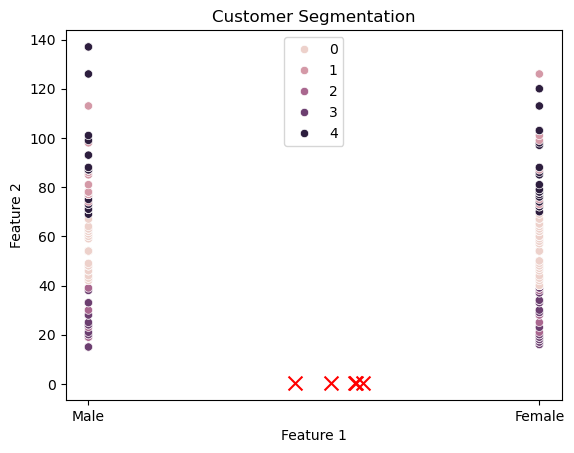

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X has numerical features in the last two columns
labels = KMeansModel.labels_
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
plt.scatter(KMeansModel.cluster_centers_[:, 0], KMeansModel.cluster_centers_[:, 1], marker='x', s=100, c='red')
plt.title('Customer Segmentation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()